### CS504 -- Digital Image Processing -- Final Project -- M2
## Topic: Road segmentation for Self Driving
## Name: Mohanavel Palaniappan Rajendran
## Year: Fall 2020
## Dept: Computer Science

# 1. Importing packages and libraries

In [1]:
# Importing necessaary packages
from numpy.random import seed
seed(123)
import numpy as np 
import pandas as pd 
import cv2
import imageio
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Input, Dropout, Flatten, InputLayer, Dense, Conv2D, ZeroPadding2D, Convolution2D
from tensorflow.keras.layers import Reshape, Activation, Permute, Layer, Conv2DTranspose
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Convolution3D, MaxPooling3D, ZeroPadding3D, UpSampling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import backend as K
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 2. Extracting and importing images

In [2]:
# Importing all the image directories and its filenames
img_path_a = "dataA/dataA/CameraRGB/"
seg_path_a = "dataA/dataA/CameraSeg/"
img_path_b = "dataB/dataB/CameraRGB/"
seg_path_b = "dataB/dataB/CameraSeg/"
img_path_c = "dataC/dataC/CameraRGB/"
seg_path_c = "dataC/dataC/CameraSeg/"
img_path_d = "dataD/dataD/CameraRGB/"
seg_path_d = "dataD/dataD/CameraSeg/"
img_path_e = "dataE/dataE/CameraRGB/"
seg_path_e = "dataE/dataE/CameraSeg/"

image_a = os.listdir(img_path_a)
seg_a = os.listdir(seg_path_a)
image_b = os.listdir(img_path_b)
seg_b = os.listdir(seg_path_b)
image_c = os.listdir(img_path_c)
seg_c = os.listdir(seg_path_c)
image_d = os.listdir(img_path_d)
seg_d = os.listdir(seg_path_d)
image_e = os.listdir(img_path_e)
seg_e = os.listdir(seg_path_e)

image_a = [img_path_a+i for i in image_a]
seg_a = [seg_path_a+i for i in seg_a]
image_b = [img_path_b+i for i in image_b]
seg_b = [seg_path_b+i for i in seg_b]
image_c = [img_path_c+i for i in image_c]
seg_c = [seg_path_c+i for i in seg_c]
image_d = [img_path_d+i for i in image_d]
seg_d = [seg_path_d+i for i in seg_d]
image_e = [img_path_e+i for i in image_e]
seg_e = [seg_path_e+i for i in seg_e]

h, w = 600, 800

In [3]:
# Converting the images into numpy array from directory 1
rgb_image_a = np.zeros((len(image_a), h, w, 3), dtype=np.int16)
road_mask_a = np.zeros((len(image_a), h, w, 1), dtype=np.int8)

for n in tqdm(range(len(image_a))):
    img = imageio.imread(image_a[n])  
    
    mask = imageio.imread(seg_a[n])
    road = np.zeros((h, w, 1), dtype=np.int8)
    road[np.where(mask==7)[0], np.where(mask==7)[1]]=1
    
    rgb_image_a[n] = img
    road_mask_a[n] = road

100%|██████████| 1000/1000 [00:39<00:00, 25.07it/s]


In [4]:
# Converting the images into numpy array from directory 2
rgb_image_b = np.zeros((len(image_b), h, w, 3), dtype=np.int16)
road_mask_b = np.zeros((len(image_b), h, w, 1), dtype=np.int8)

for n in tqdm(range(len(image_b))):
    img = imageio.imread(image_b[n])  
    
    mask = imageio.imread(seg_b[n])
    road = np.zeros((h, w, 1), dtype=np.int8)
    road[np.where(mask==7)[0], np.where(mask==7)[1]]=1
    
    rgb_image_b[n] = img
    road_mask_b[n] = road

100%|██████████| 1000/1000 [00:50<00:00, 19.95it/s]


In [5]:
# Converting the images into numpy array from directory 3
rgb_image_c = np.zeros((len(image_c), h, w, 3), dtype=np.int16)
road_mask_c = np.zeros((len(image_c), h, w, 1), dtype=np.int8)

for n in tqdm(range(len(image_c))):
    img = imageio.imread(image_c[n])  
    
    mask = imageio.imread(seg_c[n])
    road = np.zeros((h, w, 1), dtype=np.int8)
    road[np.where(mask==7)[0], np.where(mask==7)[1]]=1
    
    rgb_image_c[n] = img
    road_mask_c[n] = road

100%|██████████| 1000/1000 [00:46<00:00, 21.66it/s]


In [6]:
# Converting the images into numpy array from directory 4
rgb_image_d = np.zeros((len(image_d), h, w, 3), dtype=np.int16)
road_mask_d = np.zeros((len(image_d), h, w, 1), dtype=np.int8)

for n in tqdm(range(len(image_d))):
    img = imageio.imread(image_d[n])  
    
    mask = imageio.imread(seg_d[n])
    road = np.zeros((h, w, 1), dtype=np.int8)
    road[np.where(mask==7)[0], np.where(mask==7)[1]]=1
    
    rgb_image_d[n] = img
    road_mask_d[n] = road

100%|██████████| 1000/1000 [00:46<00:00, 21.34it/s]


In [7]:
# Converting the images into numpy array from directory 5
rgb_image_e = np.zeros((len(image_e), h, w, 3), dtype=np.int16)
road_mask_e = np.zeros((len(image_e), h, w, 1), dtype=np.int8)

for n in tqdm(range(len(image_e))):
    img = imageio.imread(image_e[n])  
    
    mask = imageio.imread(seg_e[n])
    road = np.zeros((h, w, 1), dtype=np.int8)
    road[np.where(mask==7)[0], np.where(mask==7)[1]]=1
    
    rgb_image_e[n] = img
    road_mask_e[n] = road

100%|██████████| 1000/1000 [00:46<00:00, 21.33it/s]


# 3. Data preprocessing

In [8]:
# Concatenate all the images from 5 directories
rgb_image=np.concatenate([rgb_image_a, rgb_image_b, rgb_image_c, rgb_image_d, rgb_image_e])
road_mask=np.concatenate([road_mask_a, road_mask_b, road_mask_c, road_mask_d, road_mask_e])

# Split/ shuffle training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(rgb_image, road_mask, test_size=0.1, shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=True, random_state=42)

# 4. Building SegNet model

In [9]:
# Custom SegNet model
inputs = Input(shape=(h, w, 3))
k=8

# Encoder
x = ZeroPadding2D((1,1))(inputs)
x = Conv2D(k, (3, 3), activation='relu', padding='valid')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = ZeroPadding2D((1,1))(x)
x = Conv2D(k*2, (3, 3), activation='relu', padding='valid')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = ZeroPadding2D((1,1))(x)
x = Conv2D(k*4, (3, 3), activation='relu', padding='valid')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = ZeroPadding2D((1,1))(x)
x = Conv2D(k*8, (3, 3), activation='relu', padding='valid')(x)
en = BatchNormalization()(x)

# Decoder
x = ZeroPadding2D((1,1))(en)
x = Conv2D(k*8, (3, 3), activation='relu', padding='valid')(x)
x = BatchNormalization()(x)

x = UpSampling2D((2, 2))(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(k*4, (3, 3), activation='relu', padding='valid')(x)
x = BatchNormalization()(x)

x = UpSampling2D((2, 2))(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(k*2, (3, 3), activation='relu', padding='valid')(x)
x = BatchNormalization()(x)

x = UpSampling2D((2, 2))(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(k, (3, 3), activation='relu', padding='valid')(x)
x = BatchNormalization()(x)

outputs = Conv2D(1, (1, 1), activation='sigmoid', padding='valid')(x)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 600, 800, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 602, 802, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 600, 800, 8)       224       
_________________________________________________________________
batch_normalization (BatchNo (None, 600, 800, 8)       32        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 300, 400, 8)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 302, 402, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 400, 16)      1168  

# 5. Model parameter setting, augmentation and training

In [10]:
# Hyper-parameter setting
batch_size=32
epochs=100
patience=10

# Callback functions to control over-fitting and Learning Rate
callbacks = [EarlyStopping(monitor="val_loss", mode='min', patience=patience, verbose=1),
                ReduceLROnPlateau(monitor="val_loss", mode='min', patience=patience, verbose=1, factor=0.2),
                ModelCheckpoint('dip_final_project_3210.h5',monitor="val_loss", mode='min', verbose=1, save_best_only=True)]

# Image augmentation to enhance the image brightness
train_gen = ImageDataGenerator(
                            brightness_range=[1.0,1.25],
                            validation_split=0.1
                            )

train_generator = train_gen.flow(X_train, y_train, batch_size=batch_size, shuffle=True)
val_generator = train_gen.flow(X_val, y_val, batch_size=batch_size)

# Training the model
history = model.fit_generator(train_generator
                    , steps_per_epoch=train_generator.n // batch_size
                    , epochs=epochs
                    , validation_data=val_generator
                    , validation_steps=val_generator.n // batch_size
                    , callbacks=callbacks)


Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 126 steps, validate for 14 steps
Epoch 1/100
125/126 [============================>.] - ETA: 1s - loss: 0.2876 - accuracy: 0.9189
Epoch 00001: val_loss improved from inf to 0.38055, saving model to dip_final_project_1610f.h5
126/126 [==============================] - 211s 2s/step - loss: 0.2868 - accuracy: 0.9191 - val_loss: 0.3806 - val_accuracy: 0.8537
Epoch 2/100
125/126 [============================>.] - ETA: 0s - loss: 0.1298 - accuracy: 0.9629
Epoch 00002: val_loss improved from 0.38055 to 0.19067, saving model to dip_final_project_1610f.h5
126/126 [==============================] - 67s 535ms/step - loss: 0.1296 - accuracy: 0.9630 - val_loss: 0.1907 - val_accuracy: 0.9258
Epoch 3/100
125/126 [============================>.] - ETA: 0s - loss: 0.0991 - accuracy: 0.9681
Epoch 00003: val_loss improved from 0.19067 to 0.09227, saving model to dip_fina

# 6. Quantitative results

In [11]:
# Training set evaluation
train_gt=y_train.reshape((len(X_train),h, w))
train_predicted=np.zeros((len(X_train),h,w))
for i in range(len(X_train)):
    train_pred=model.predict(np.expand_dims(X_train[i], 0))
    train_pred=train_pred.flatten()
    train_pred=np.array([1 if i >= 0.5 else 0 for i in train_pred])
    train_predicted[i]=train_pred.reshape(h,w)
    
# Training set Avg. IoU score
tn_total=[]
for i in range(len(X_train)):
    tn_intersection = np.logical_and(train_gt[i], train_predicted[i])
    tn_union = np.logical_or(train_gt[i], train_predicted[i])
    train_iou = np.sum(tn_intersection) / np.sum(tn_union)
    tn_total.append(train_iou)
print('Training Average IOU score: %.2f%%' % (sum(tn_total)/len(y_train) * 100))


# Test set evaluation
test_gt=y_test.reshape((len(X_test),h, w))
test_predicted=np.zeros((len(X_test),h,w))
for i in range(len(X_test)):
    test_pred=model.predict(np.expand_dims(X_test[i], 0))
    test_pred=test_pred.flatten()
    test_pred=np.array([1 if i >= 0.5 else 0 for i in test_pred])
    test_predicted[i]=test_pred.reshape(h,w)
    
# Test set Avg. IoU score
tt_total=[]
for i in range(len(X_test)):
    tt_intersection = np.logical_and(test_gt[i], test_predicted[i])
    tt_union = np.logical_or(test_gt[i], test_predicted[i])
    test_iou = np.sum(tt_intersection) / np.sum(tt_union)
    tt_total.append(test_iou)
print('Test Average IOU score: %.2f%%' % (sum(tt_total)/len(y_test) * 100))

Training Average IOU score: 96.68%
Test Average IOU score: 96.31%


# 7. Qualitative results

Text(0.5, 1.0, 'Predicted mask')

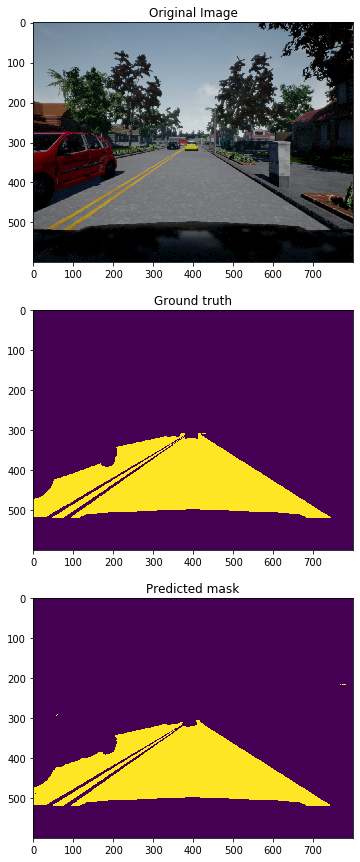

In [34]:
# Selecting random image index
ind = np.array([i for i in range(len(X_test))])
np.random.shuffle(ind)
# Result 1
n = ind[1]
fig, ax = plt.subplots(3, 1, figsize=(15,15))
ax[0].imshow(X_test[n].reshape(h, w, 3))
ax[0].set_title('Original Image')
ax[1].imshow(y_test[n].reshape(h, w))
ax[1].set_title('Ground truth')
ax[2].imshow(test_predicted[n])
ax[2].set_title('Predicted mask')

Text(0.5, 1.0, 'Predicted mask')

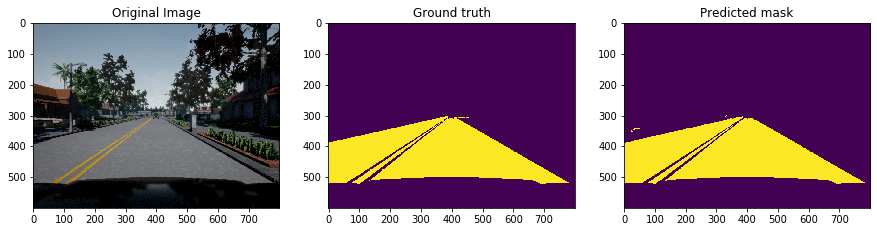

In [35]:
# Result 2
n = ind[2]
fig, ax = plt.subplots(1, 3, figsize=(15,15))
ax[0].imshow(X_test[n].reshape(h, w, 3))
ax[0].set_title('Original Image')
ax[1].imshow(y_test[n].reshape(h, w))
ax[1].set_title('Ground truth')
ax[2].imshow(test_predicted[n])
ax[2].set_title('Predicted mask')

# 8. Loss vs. epochs graph

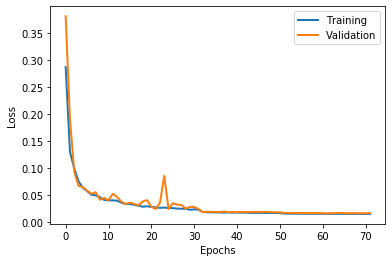

In [15]:
# loss vs. epochs graph
plt.plot(range(len(history.history['loss'])), history.history['loss'], linewidth = 2, label = "Training")
plt.plot(range(len(history.history['loss'])), history.history['val_loss'], linewidth = 2, label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()